Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> if I can give some recommendations
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
* Thank you for sending your project. You've done a really good job on it! It was interesting to check. 
* Glad to see that notebook is well-structured.
* Great that markers were used in conclusions. Moreover, the findings were informative and interesting to read.
* Please name the plots and axes next time. You can use 'plt.title()', 'plt.xlabel()' and 'plt.ylabel()' for it.
* I've left some comments which could help you to improve your project and further develop your skills.
* Your project has been accepted and now you can move on to the next sprint.
* Keep up the good work, and good luck on the next sprint!

# 1. Exploratory data analysis

Found 7591 validated image filenames.


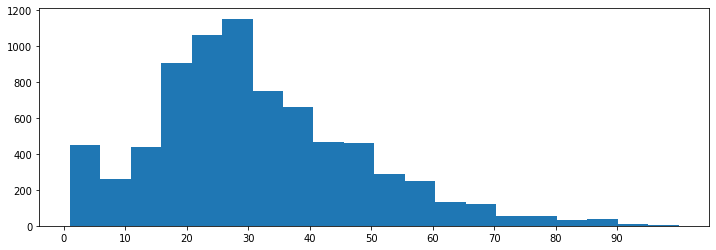

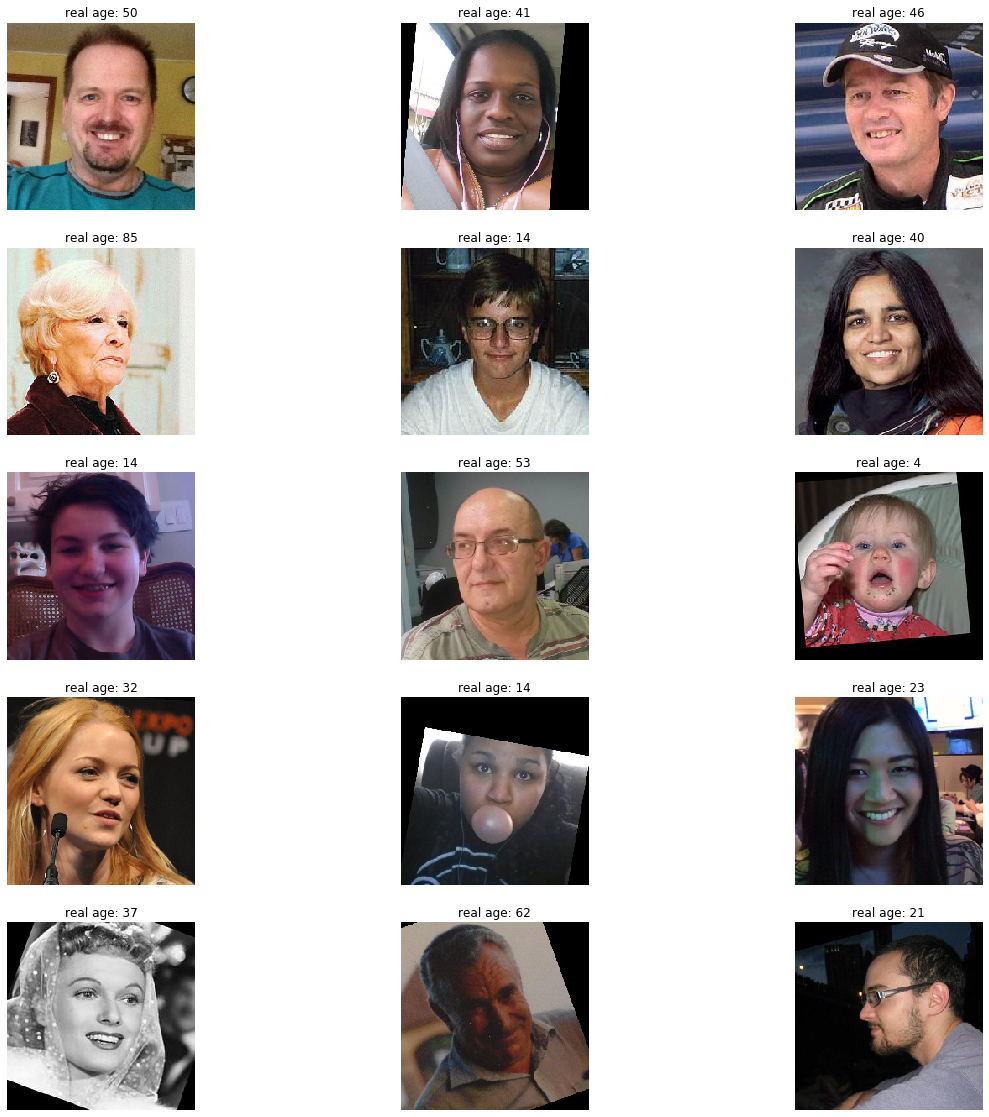

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(dataframe=labels,
                                                                  directory='/datasets/faces/final_files/',
                                                         x_col='file_name', y_col='real_age', target_size=(224, 224),
                                                         batch_size=32, class_mode='raw', seed=12345)
# Age Distribution:
plt.hist(labels['real_age'], bins=20)
plt.xticks(range(0,100,10))
plt.gcf().set_size_inches(12,4)
plt.show()
# The first 15 images and the real ages:
x_batch, y_batch = train_gen_flow[0]
nrows = 5
ncols = 3
_, axarr = plt.subplots(nrows,ncols,figsize=(20,20))
for irow in range(nrows):
    for icol in range(ncols):
        i = irow*ncols + icol
        axarr[irow,icol].axis('off')
        axarr[irow,icol].title.set_text(f'real age: {y_batch[i]}')
        axarr[irow,icol].imshow(x_batch[i])


<div class="alert alert-block alert-info">
<b>Improve: </b> Please, don't forget about using '.head()' when you open some files.
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> It would be better if you provided some findings about: dataset size, target feature distribution, dataset structure?
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> Great that target feature distribution was visualized!
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> <span style="font-family: monospace"> ImageDataGenerator </span> and <span style="font-family: monospace"> flow_from_dataframe </span> were used correctly! Well done!
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> Glad to see some samples from data!
</div>

# 2. Model training

Transfer the model training code and the result of printing on the screen here.


(The code in this section is run on a separate GPU platform, so it is not designed as a cell with a code, but as a code in a text cell)

```python

# < paste code here >
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        rescale=1./255)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)
    return train_gen_flow
def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)
    return test_gen_flow
def create_model(input_shape):
    backbone = ResNet50(weights='imagenet',
                        input_shape=input_shape,
                        include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(lr=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model
def train_model(model, train_data, test_data, batch_size=None, epochs=11,
                steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
    return model
```

```

# < paste the result of printing on the screen here >
# < you can delete long lines with model downloading>
2020-08-14 13:53:11.023445: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2020-08-14 13:53:11.414367: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2020-08-14 13:53:24.315261: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-08-14 13:53:24.936741: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2020-08-14 13:53:24.936821: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-08-14 13:53:24.936857: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-08-14 13:53:25.266171: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2020-08-14 13:53:25.341181: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2020-08-14 13:53:25.940436: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2020-08-14 13:53:26.007549: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2020-08-14 13:53:26.007704: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2020-08-14 13:53:26.011537: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2020-08-14 13:53:26.011935: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-08-14 13:53:26.180245: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1999990000 Hz
2020-08-14 13:53:26.216643: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x4e4a240 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-08-14 13:53:26.216688: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-08-14 13:53:26.557463: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x4ed0260 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2020-08-14 13:53:26.557506: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2020-08-14 13:53:26.559510: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2020-08-14 13:53:26.559564: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-08-14 13:53:26.559578: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-08-14 13:53:26.559602: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2020-08-14 13:53:26.559616: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2020-08-14 13:53:26.559629: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2020-08-14 13:53:26.559641: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2020-08-14 13:53:26.559666: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2020-08-14 13:53:26.563156: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2020-08-14 13:53:26.597234: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-08-14 13:53:32.874942: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2020-08-14 13:53:32.874997: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2020-08-14 13:53:32.875006: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2020-08-14 13:53:32.896602: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 30509 MB memory) -> physical GPU (device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 356 steps, validate for 119 steps
Epoch 1/11
2020-08-14 13:54:09.320153: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-08-14 13:54:13.302960: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 111s - loss: 214.8290 - mae: 11.1135 - val_loss: 307.7367 - val_mae: 13.0187
Epoch 2/11
356/356 - 38s - loss: 130.1423 - mae: 8.7372 - val_loss: 275.3267 - val_mae: 12.7030
Epoch 3/11
356/356 - 38s - loss: 114.0574 - mae: 8.1452 - val_loss: 172.9360 - val_mae: 10.0197
Epoch 4/11
356/356 - 39s - loss: 94.5896 - mae: 7.4150 - val_loss: 160.5958 - val_mae: 9.0182
Epoch 5/11
356/356 - 38s - loss: 80.2826 - mae: 6.8318 - val_loss: 86.5953 - val_mae: 7.0397
Epoch 6/11
356/356 - 39s - loss: 68.9911 - mae: 6.3577 - val_loss: 135.1567 - val_mae: 9.3919
Epoch 7/11
356/356 - 39s - loss: 62.7271 - mae: 6.0652 - val_loss: 144.1504 - val_mae: 8.8162
Epoch 8/11
356/356 - 38s - loss: 47.8733 - mae: 5.3662 - val_loss: 89.1950 - val_mae: 7.2903
Epoch 9/11
356/356 - 39s - loss: 43.7018 - mae: 5.0197 - val_loss: 85.1037 - val_mae: 6.9099
Epoch 10/11
356/356 - 38s - loss: 35.3283 - mae: 4.5524 - val_loss: 97.3203 - val_mae: 7.2187
Epoch 11/11
356/356 - 39s - loss: 33.7332 - mae: 4.4860 - val_loss: 100.1970 - val_mae: 7.5203
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 9s - loss: 100.1970 - mae: 7.5203
Test MAE: 7.5203

```

<div class="alert alert-block alert-success">
<b>Success:</b> This part was done very perfectly! All functions are defined correctly! You've achieved a good score! 
</div>

# 3. Trained model analysis

The ResNet50 did a quite good job of age approximation from photos!
- a regression task was modeled: one last Dense layer consisting of single node with relu activation
- Just 11 epochs were required.
- A descent Mean Absoulte Error of 7.52 on the Test was achieved on the 11th epoch.
- The best result was on the 5th epoch: 6.8318 on the Train set and 7.0397 on the Test - a minimal overfit.

<div class="alert alert-block alert-success">
<b>Success:</b> Model analysis was done very well! Keep it up!
</div>

# Checklist

- [x]  Notebook was opened
- [x]  The code is error free
- [x]  The cells with code have been arranged by order of execution
- [x]  The exploratory data analysis has been performed
- [x]  The results of the exploratory data analysis have been transferred to the final notebook
- [x]  The model's MAE score is not higher than 8
- [x]  The model training code has been copied to the final notebook
- [x]  The model's printing on the screen result has been transferred to the final notebook
- [x]  The findings have been provided based on the results of the model training